<a href="https://colab.research.google.com/github/odu-cs625-datavis/public-fall23-mcw/blob/main/Customizations_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn Objects Customizations

In this notebook, we'll look at some extra customizations for Seaborn charts.

* theme customization, using [`Plot.theme()`](https://seaborn.pydata.org/generated/seaborn.objects.Plot.theme.html)
  * the note on the API page says that currently the only valid argument is a dict of matplotlib [rc parameters](https://matplotlib.org/stable/tutorials/introductory/customizing.html)
  * these parameters can also include Seaborn [`axes_style`](https://seaborn.pydata.org/generated/seaborn.axes_style.html) parameters ([examples](https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles))
* color palettes, using [`Plot.scale()`](https://seaborn.pydata.org/generated/seaborn.objects.Plot.scale.html)
* mark customization (edge color, thickness, fill color, size ranges)
* titles and labels, using [`Plot.label()`](https://seaborn.pydata.org/generated/seaborn.objects.Plot.label.html)
* axis label formatting
* chart size, using [`Plot.layout()`](https://seaborn.pydata.org/generated/seaborn.objects.Plot.layout.html)


In [ ]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so

Here we'll load all of the same datasets we had in our Marks and Channels tutorial.

In [ ]:
df = pd.read_json('https://cdn.jsdelivr.net/npm/vega-datasets@2/data/gapminder.json')
df_2000 = df.query("year == 2000")
df_2000c1 = df_2000.query("cluster == 1")
df_US = df.query("country == 'United States'")
df_5countries = df.query("country in ('United States', 'France', 'Austria', 'Brazil', 'Germany')")
df_2000_5countries = df_5countries.query("year == 2000")

We'll look at most of these customizations with the same base chart.

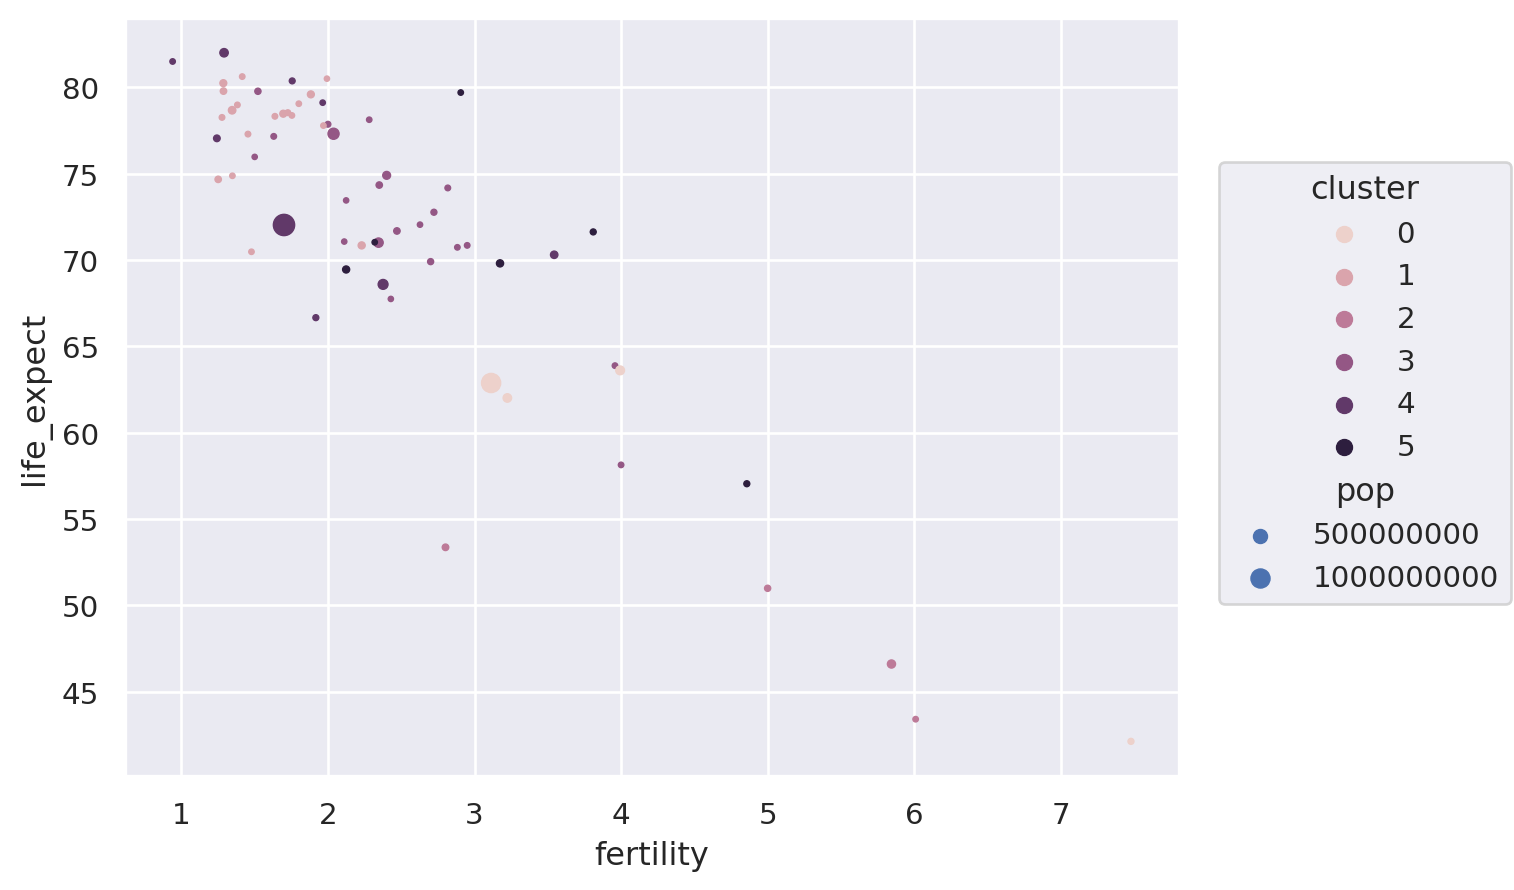

In [ ]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dot())
)

## Themes

To change the chart theme, we first need to import `axes_style`.

In [ ]:
from seaborn import axes_style

The customization below uses the `ticks` style, which has a white background with outside tick marks.

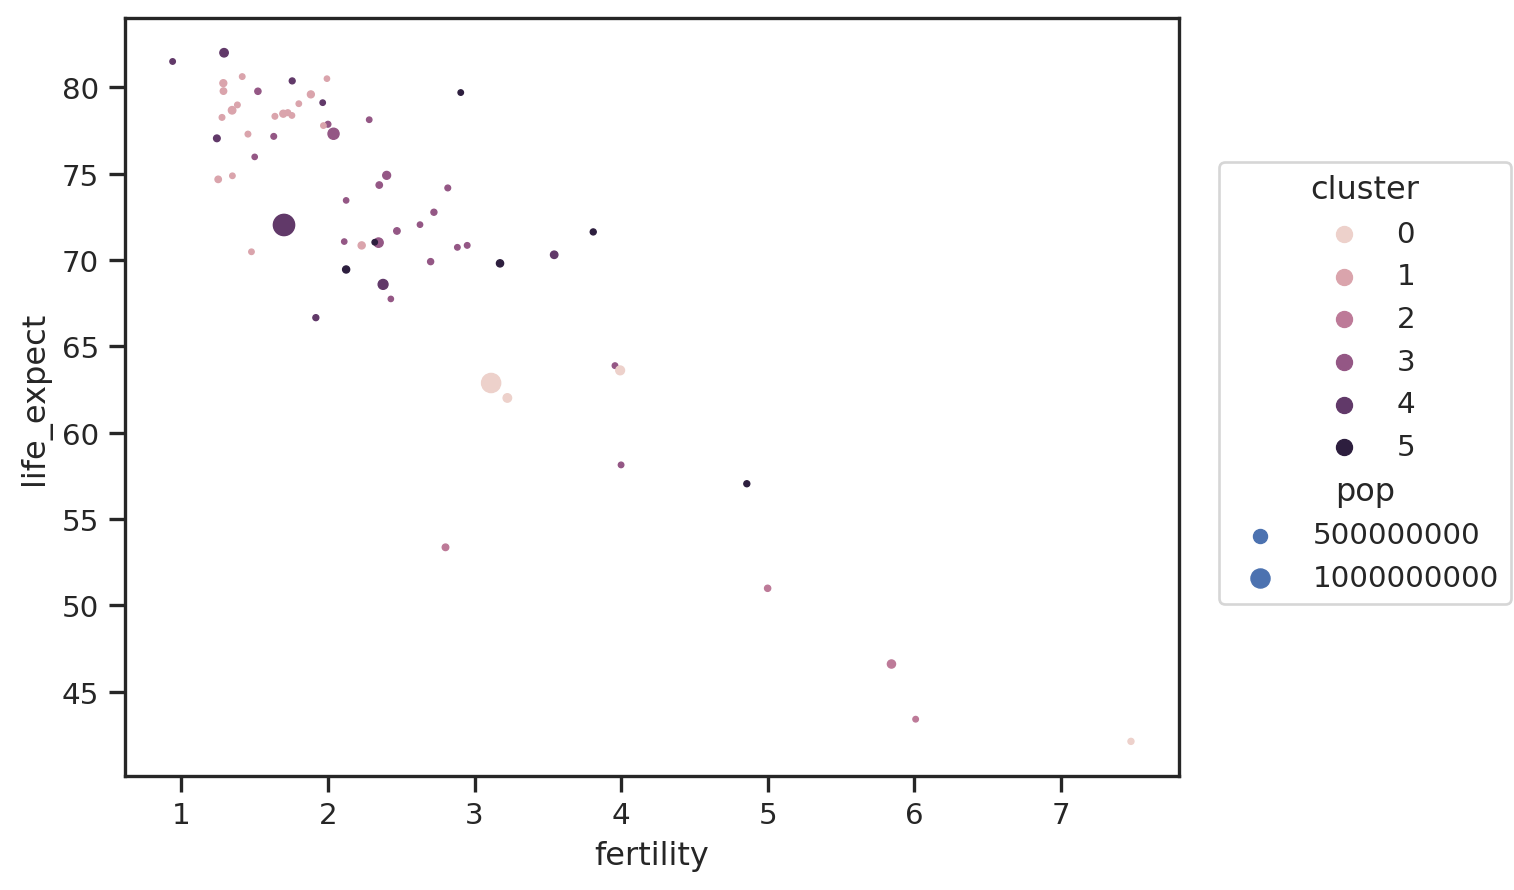

In [ ]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dot())
  .theme({**axes_style("ticks")})  # change theme
)

## Color Palettes

Scales, such as axis scales and color scales, are controlled with the [`Plot.scale()`](https://seaborn.pydata.org/generated/seaborn.objects.Plot.scale.html) function.

We'll first look at adjusting the colors used for the clusters. In the Marks and Channels tutorial, the color scale used *color saturation* for the `cluster` attribute. *Color saturation* is a *magnitude channel* that is suitable for an *ordered attribute*. However, the cluster is the result of some grouping, so it's really a *categorical attribute*. Thus, we need to specify a color palette based on *color hue*, which is an *identity channel*.

Various color palettes are shown in the [Choosing color palettes tutorial](https://seaborn.pydata.org/tutorial/color_palettes.html). For this example, we'll pick the `tab10` palette.

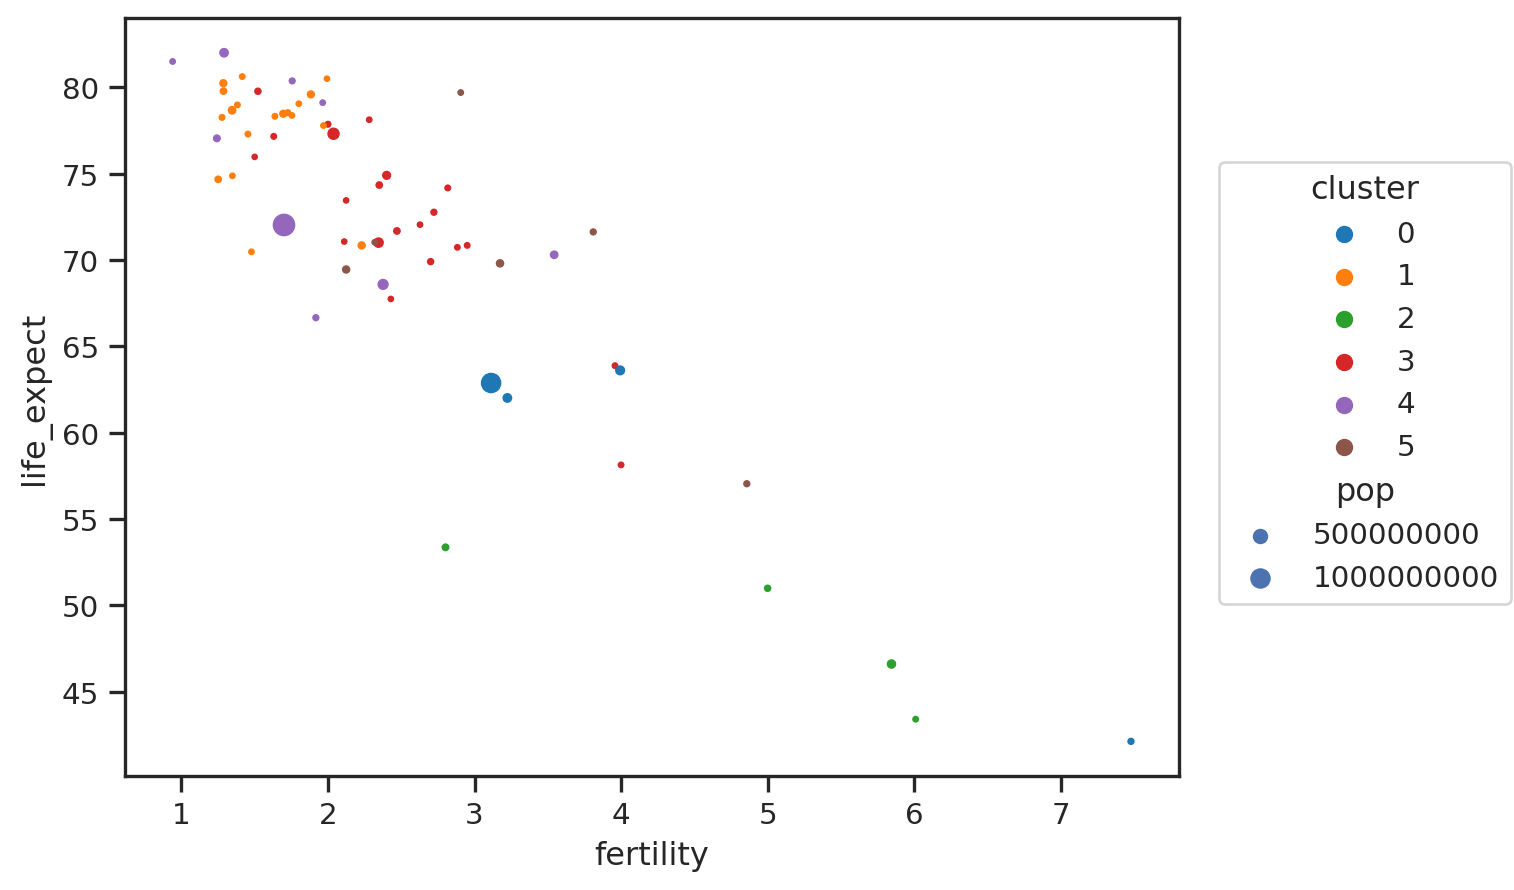

In [ ]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dot())
  .theme({**axes_style("ticks")})
  .scale(color="tab10")            # change color palette
)

## Customizing Marks

In some of the smaller dots, it's difficult to see the color, so one thing we could add is a black border around the dots to see if that will help them stand out. For this, we can specify the [`edgecolor` parameter](https://seaborn.pydata.org/tutorial/properties.html#color-properties) to the mark.

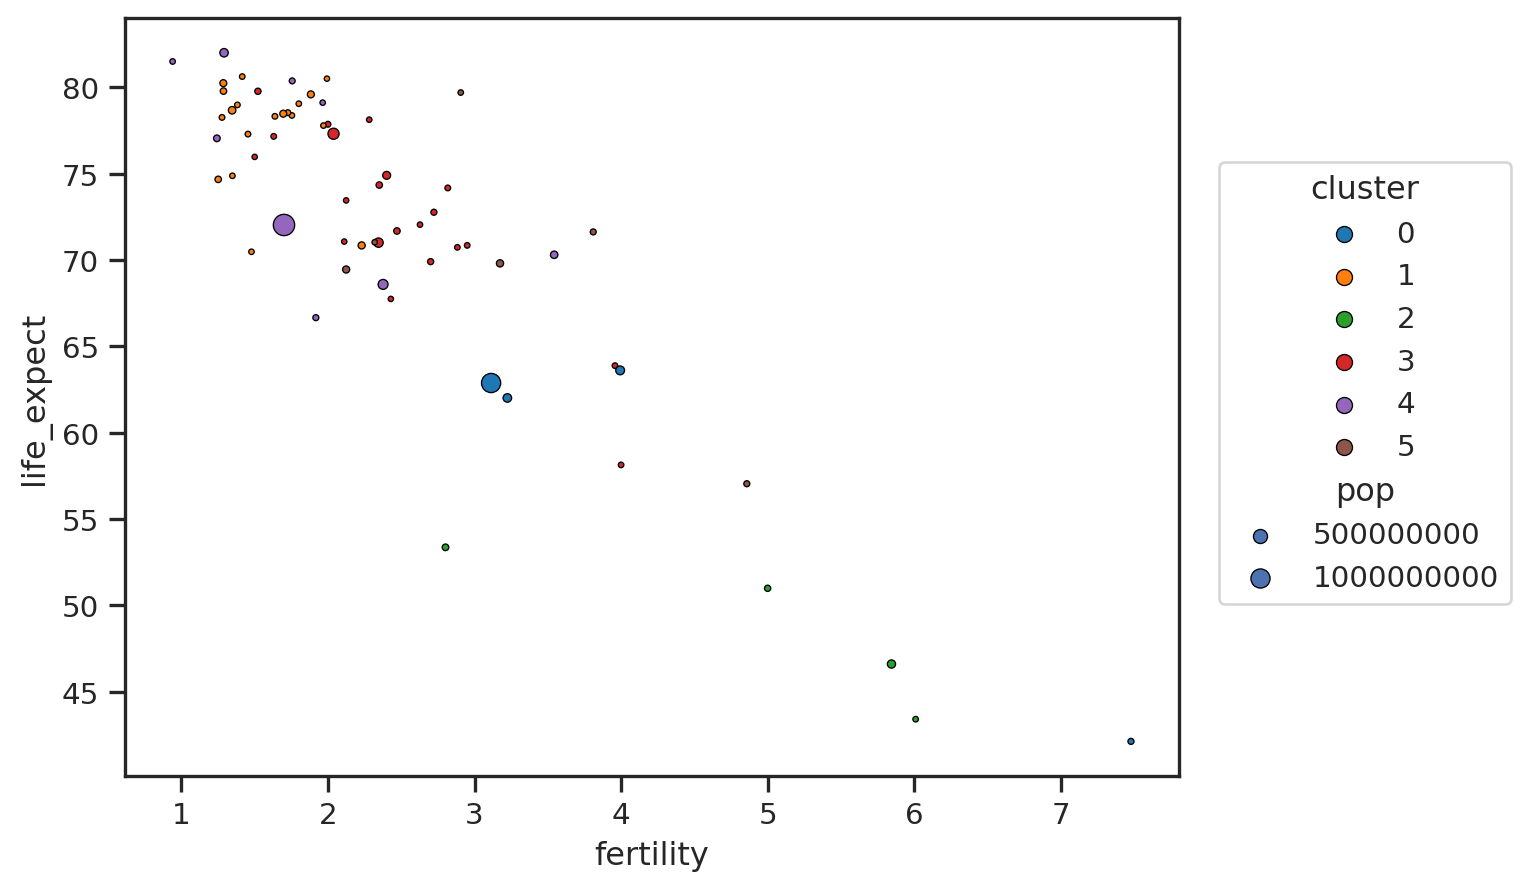

In [ ]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dot(edgecolor="black"))  # add border on dot
  .theme({**axes_style("ticks")})
  .scale(color="tab10")
)

Yet another option would be to use unfilled circles instead of filled circles to help distinguish between dots that might be overlapping. For this, we can use [`so.Dots()`](https://seaborn.pydata.org/generated/seaborn.objects.Dots.html) instead of `so.Dot()`.

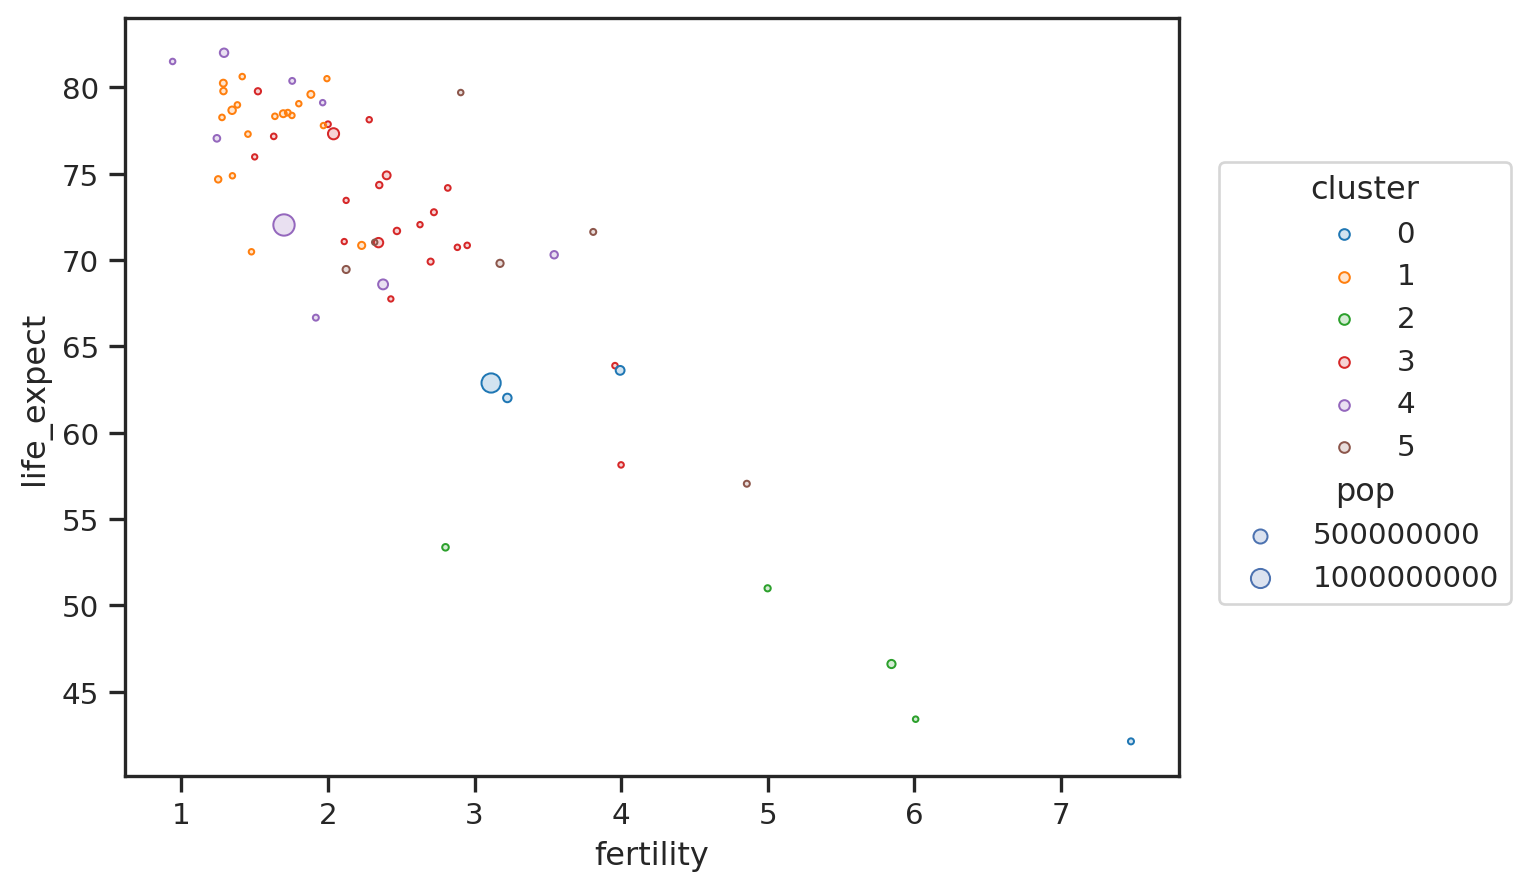

In [ ]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dots())                    # use open circles
  .theme({**axes_style("ticks")})
  .scale(color="tab10")
)

By default, the fill color is a lower saturation version of the edge color. But, in the same way that you can set the `edgecolor` for all dots, you can also set the `fillcolor`.

Also, with `so.Dots()`, we can set the `stroke` size to make the border thicker. Note that for some marks, including [`so.Dot()`](https://seaborn.pydata.org/generated/seaborn.objects.Dot.html), this thickness is controlled by the `edgewidth` property.  These differences are all named in the API documentation.

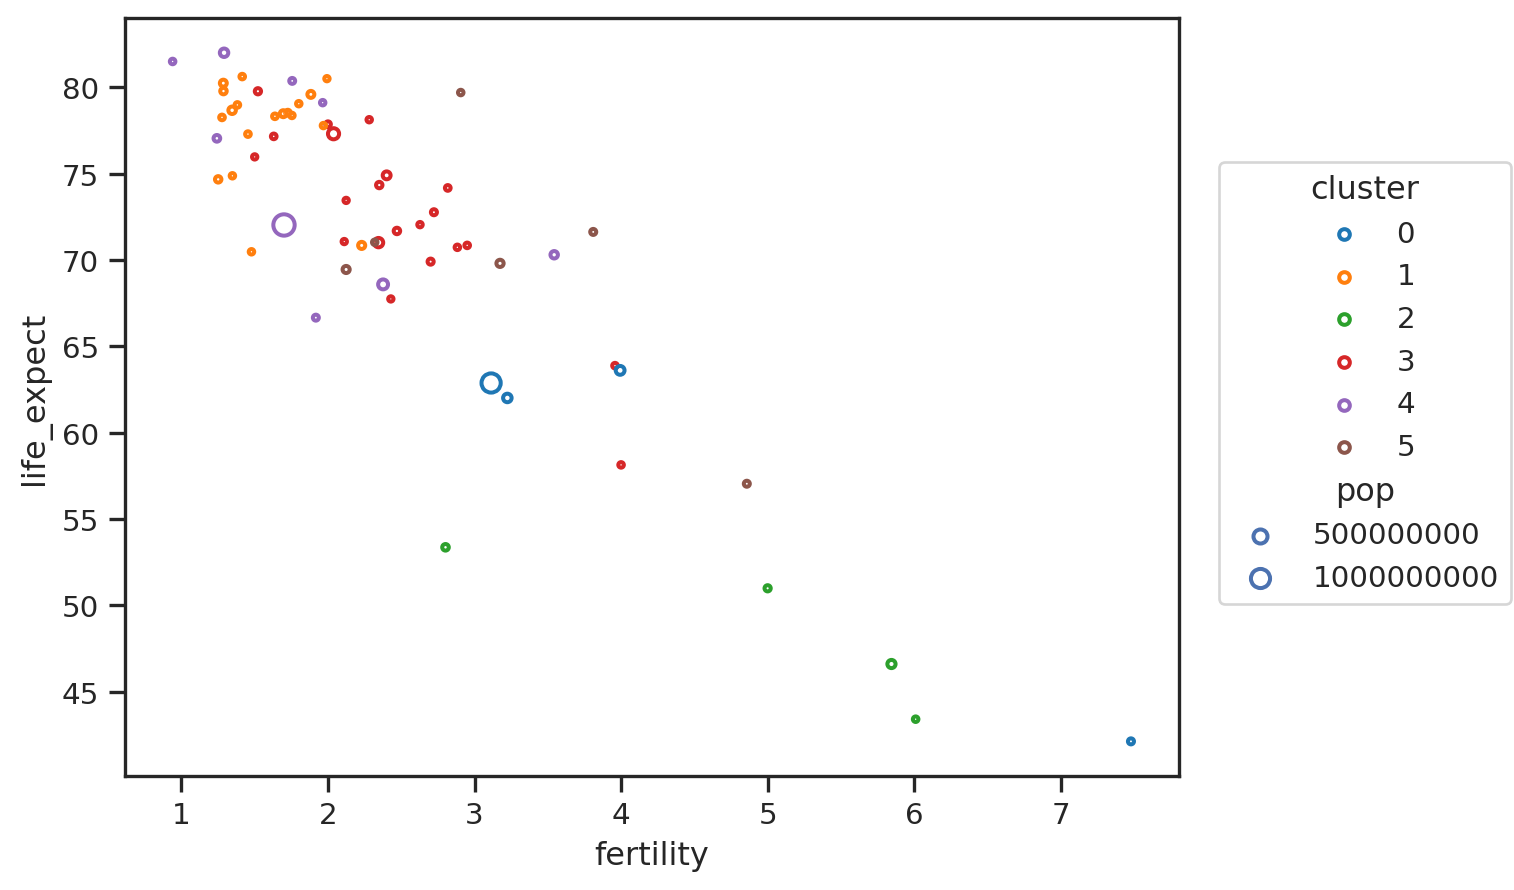

In [ ]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dots(fillcolor="white", stroke=1.5))  # change fill color and border size
  .theme({**axes_style("ticks")})
  .scale(color="tab10")
)

Next, let's look at adjusting the circle sizes. Just as we changed the range of colors used for the clusters, we can adjust the range of sizes used for population using `Plot.scale()` to modify the `pointsize` channel.

In this first example, we'll just adjust the range for the [`pointsize`](https://seaborn.pydata.org/tutorial/properties.html#pointsize-property) channel to be the tuple `(1,20)`. Note that the documentation specifies that the magnitude is represented by the diameter of the circle rather than the area.

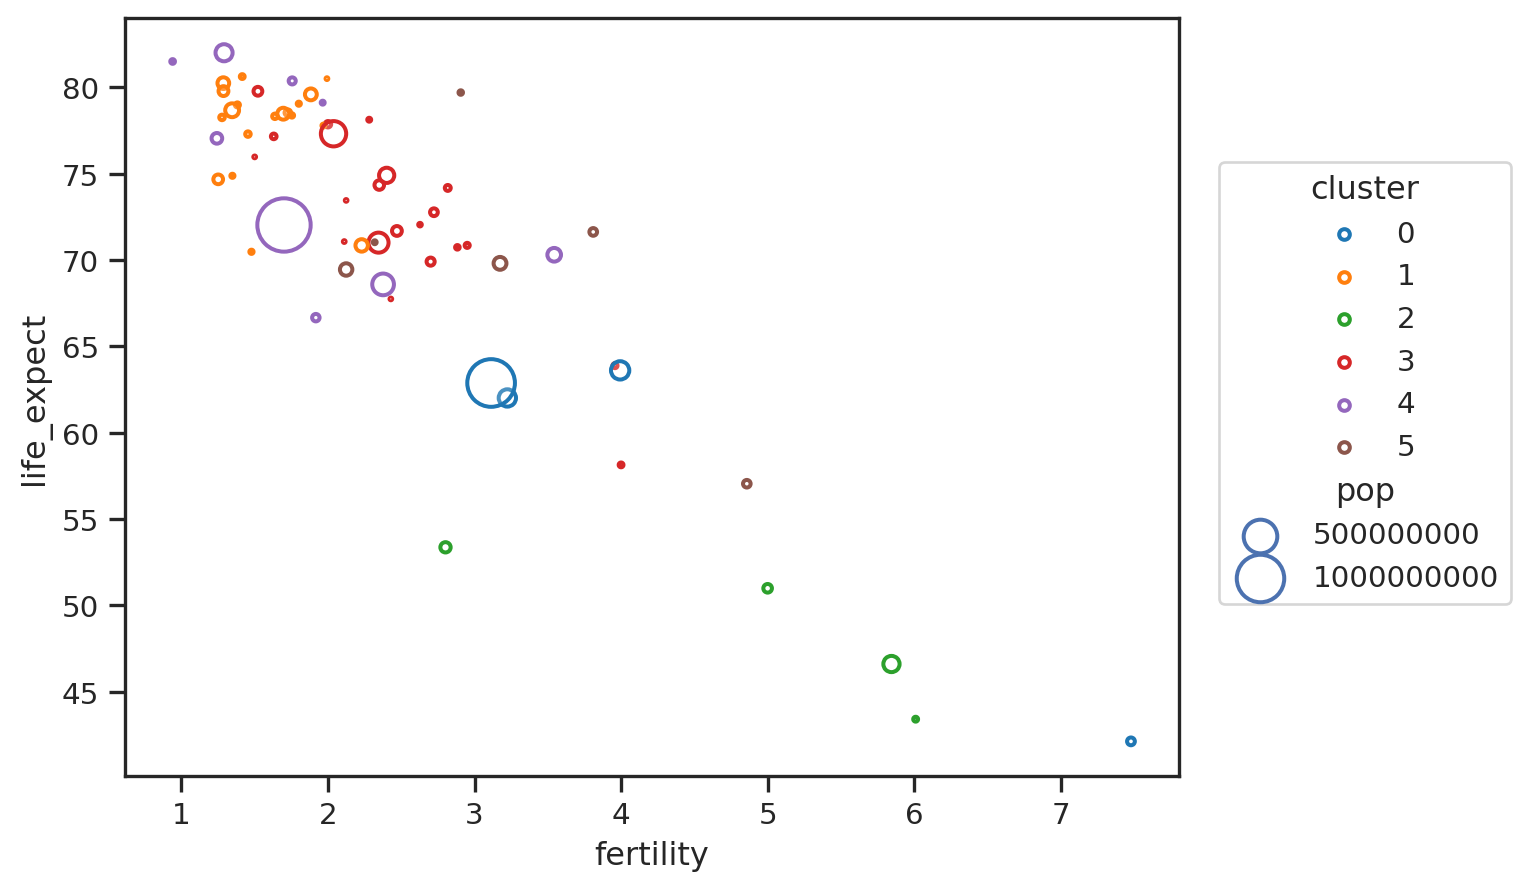

In [ ]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dots(fillcolor="white", stroke=1.5))
  .theme({**axes_style("ticks")})
  .scale(color="tab10",
         pointsize=(1,20))     # change circle size range
)

## Tick Marks and Labels

In addition to making the range of the circles larger, we can also make the legend look nicer.  

Since we want a bit more control, we'll use the [so.Continuous()](https://seaborn.pydata.org/generated/seaborn.objects.Continuous.html) function. We can still specify the range as the `(1,20)` tuple, but we can also increase the number of circle sizes shown using `tick` and format the number shown using `label`:

* `tick(upto=5)` says to choose "nice" locations (like even numbers) for the divisions, but don't create more than 5 divisions

* `label(unit="")` says to use [SI prefixes](https://en.wikipedia.org/wiki/Metric_prefix) with the given unit. Since population doesn't have a unit (like grams (g) for instance), we can specify no additional suffix by using `""`.

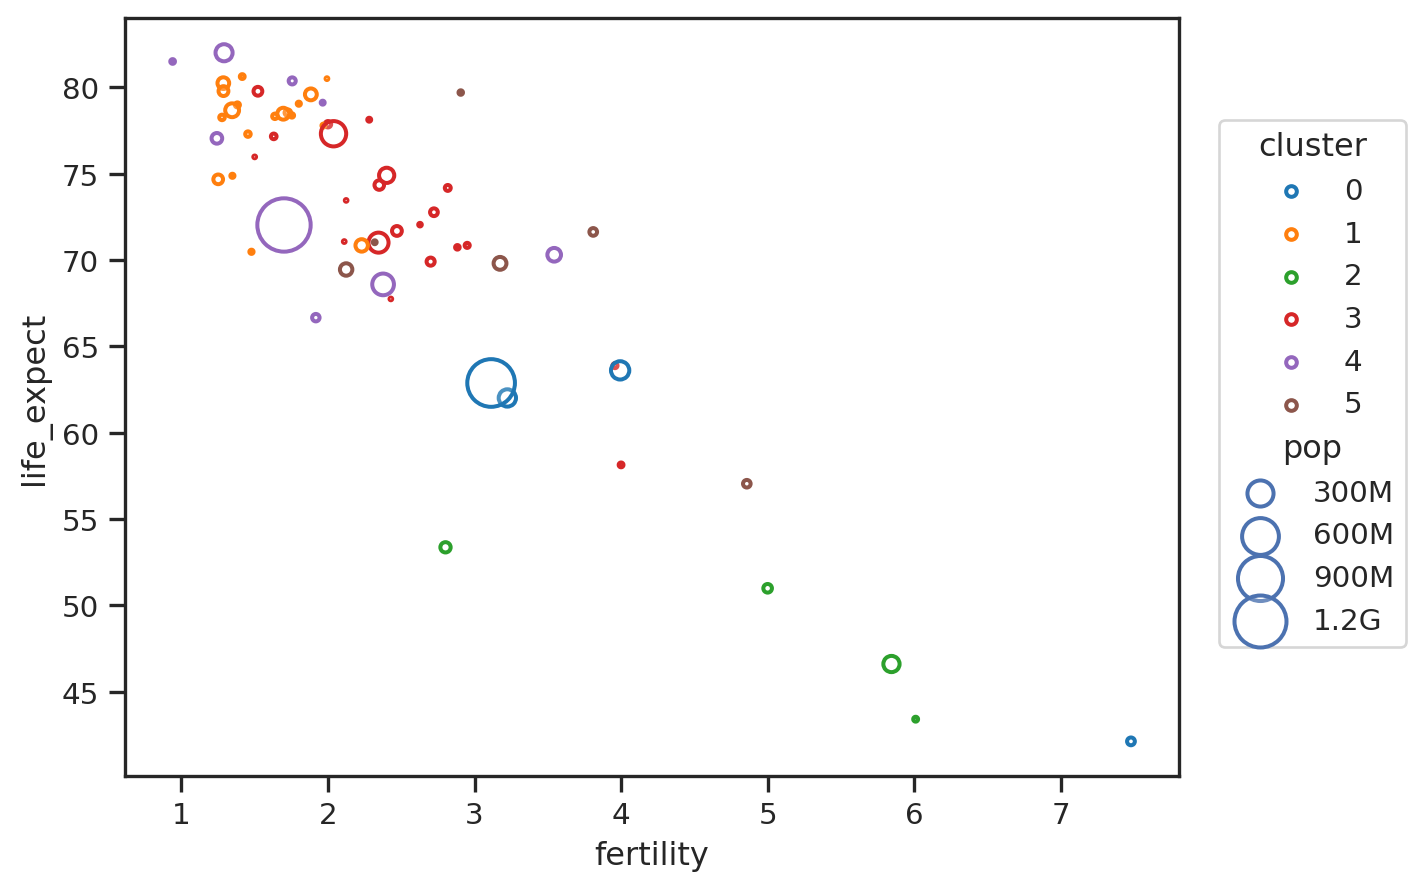

In [ ]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dots(fillcolor="white", stroke=1.5))
  .theme({**axes_style("ticks")})
  .scale(color="tab10",
         # change circle size range, number of circles in legend, label SI units
         pointsize=so.Continuous((1,20)).tick(upto=5).label(unit=""))
)

🚨

👆 Edit the cell above to experiment with different values for `upto`.  

👇 Then, copy the code into a new cell below and replace `upto` with `count` and specify a number of circles to be shown in the legend.  

❓*What difference do you see with using `upto` vs. `count`?*

## Labels and Titles

Now let's look at customizing the labels and titles on the chart using [`Plot.label()`](https://seaborn.pydata.org/generated/seaborn.objects.Plot.label.html). We can provide a label for each channel that we specify in `Plot()` as well as a `title` for the chart.



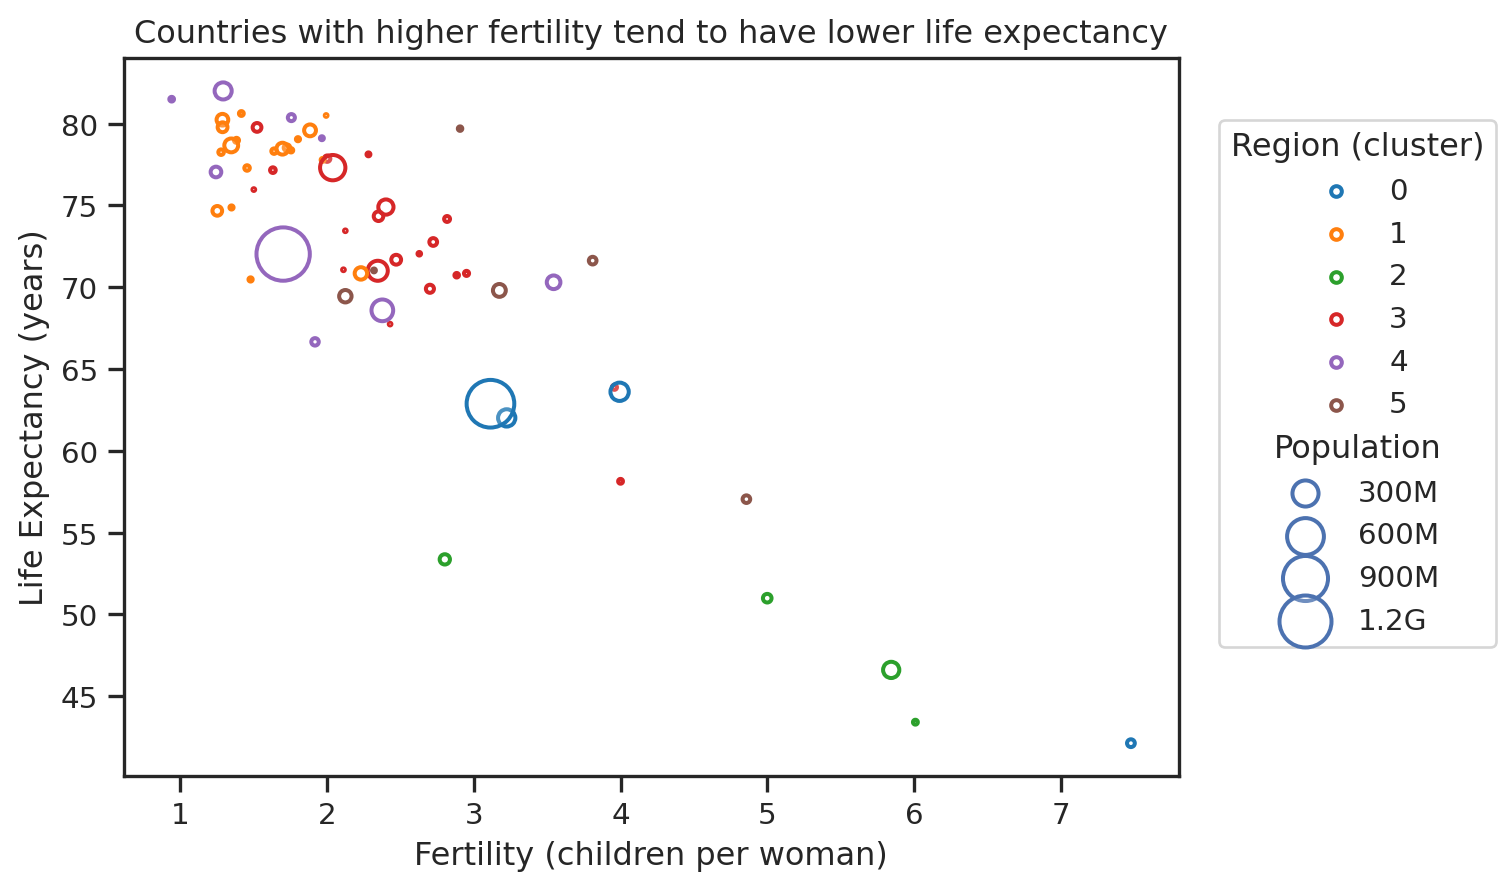

In [ ]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dots(fillcolor="white", stroke=1.5))
  .theme({**axes_style("ticks")})
  .scale(color="tab10",
         pointsize=so.Continuous((1,20)).tick(upto=5).label(unit=""))
  .label(x="Fertility (children per woman)",       # set title, x, y, and legend labels
         y="Life Expectancy (years)",
         color="Region (cluster)",
         pointsize="Population",
         title="Countries with higher fertility tend to have lower life expectancy")
)

## Number Formats

We can also use the `so.Continuous().label()` function to adjust how items on the main x,y axis are labeled. For instance, in bar chart showing population below, the population values are displayed in scientific notation by default.

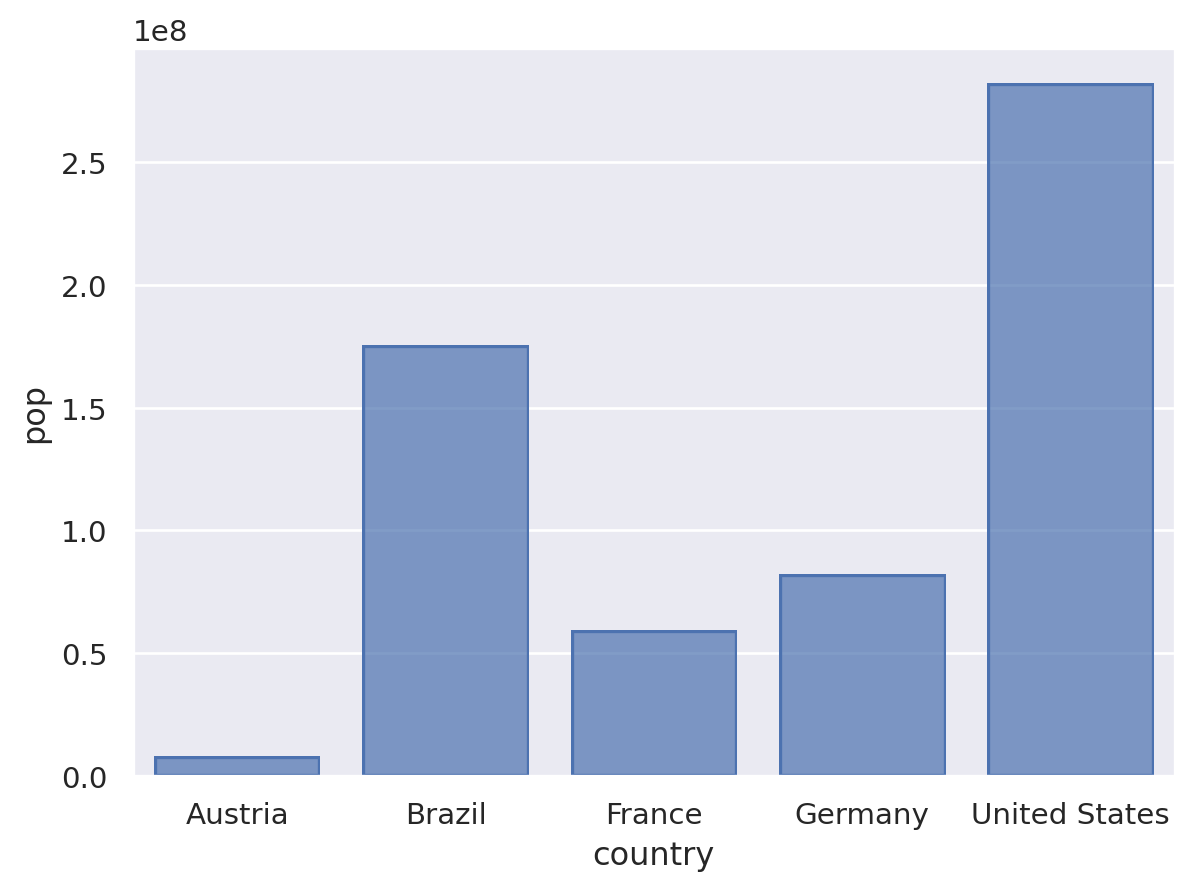

In [ ]:
(so.Plot(data=df_2000_5countries,
         x='country',
         y='pop')
  .add(so.Bar())
)

We can apply `so.Continuous().label()` to the y scale to adjust this display.

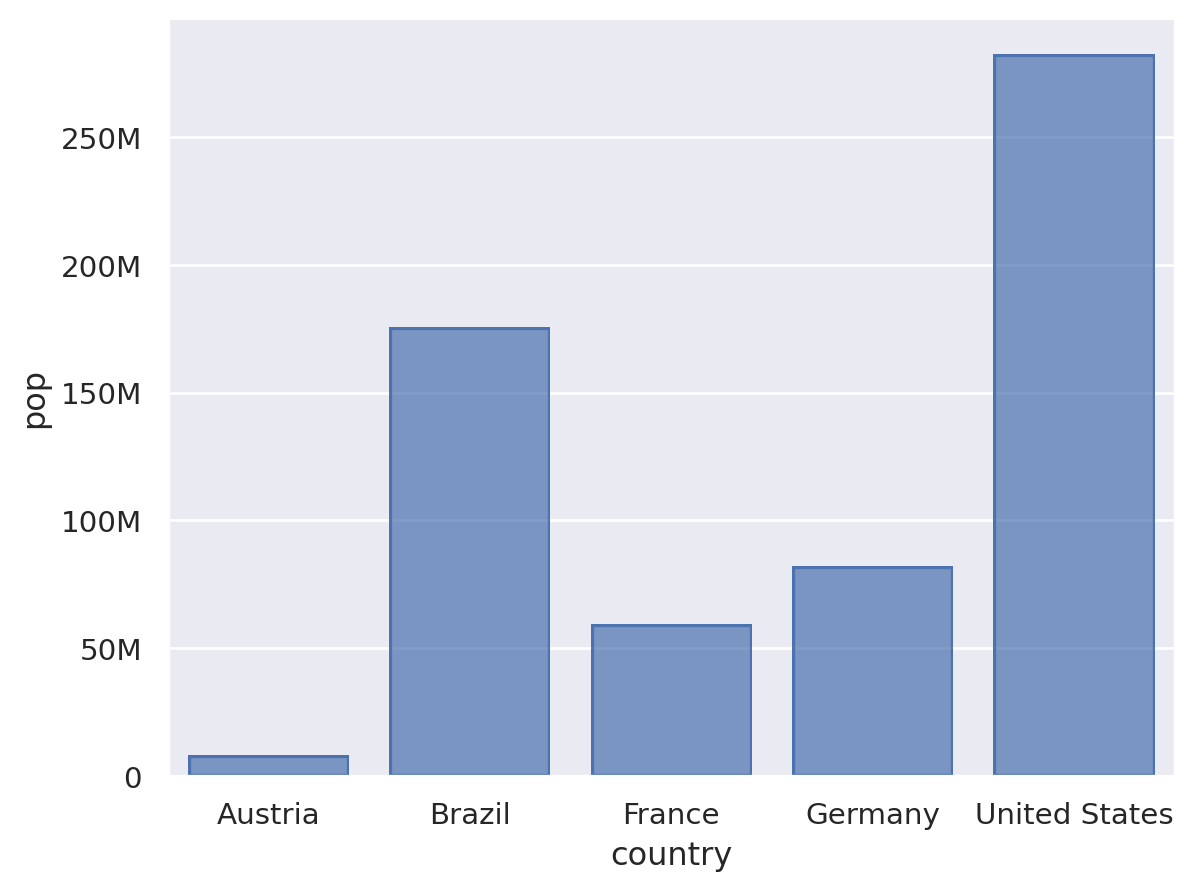

In [ ]:
(so.Plot(data=df_2000_5countries,
         x='country',
         y='pop')
  .add(so.Bar())
  .scale(y=so.Continuous().label(unit=""))  # use SI units
)

If we want to use commas instead of SI units, we can use the `like=` parameter with a [formatter](https://docs.python.org/3/library/string.html#format-examples).

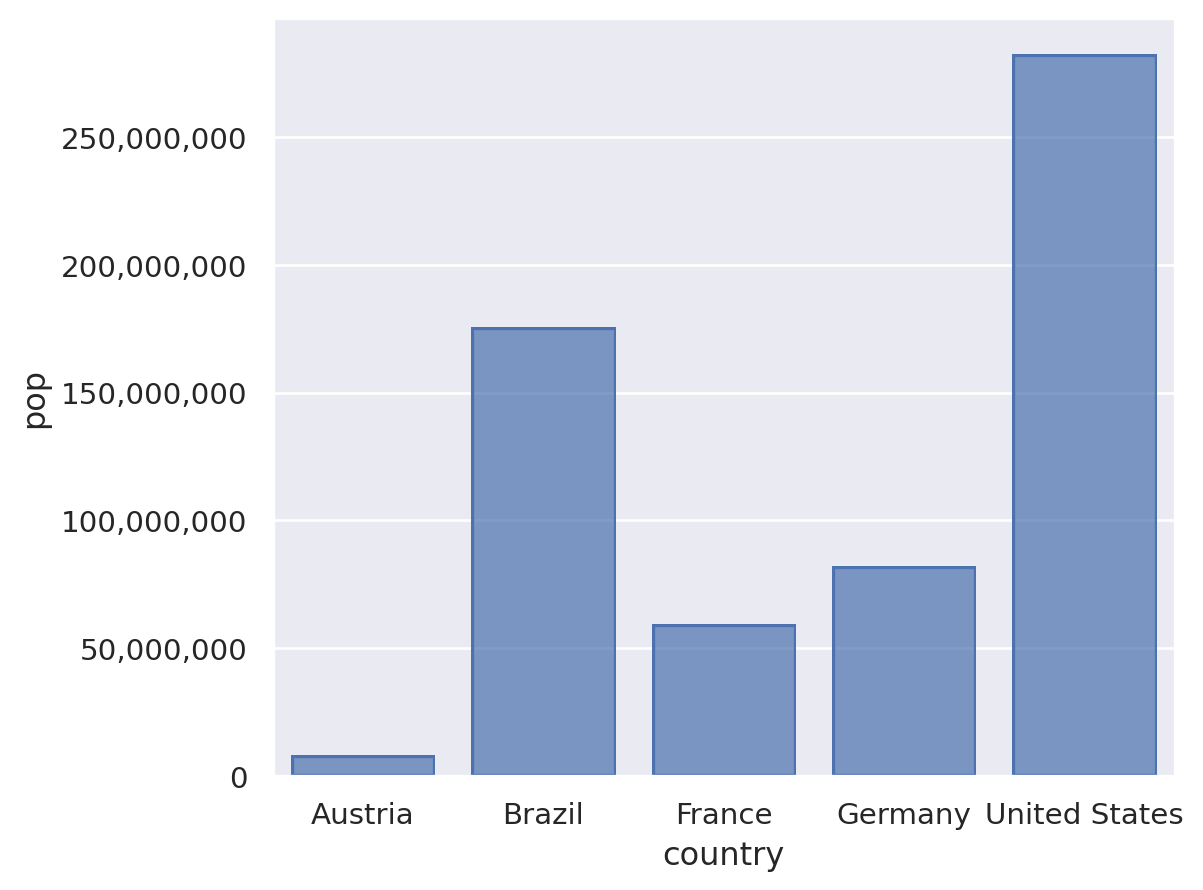

In [ ]:
(so.Plot(data=df_2000_5countries,
         x='country',
         y='pop')
  .add(so.Bar())
  .scale(y=so.Continuous().label(like="{x:,.0f}"))
  # use formatter (commas, 0 digits after the decimal)
)

## Chart Size

Our final customization is to change the chart size. Let's make it wider so that it fills more of the screen.  This can be done with [`Plot.layout()`](https://seaborn.pydata.org/generated/seaborn.objects.Plot.layout.html).

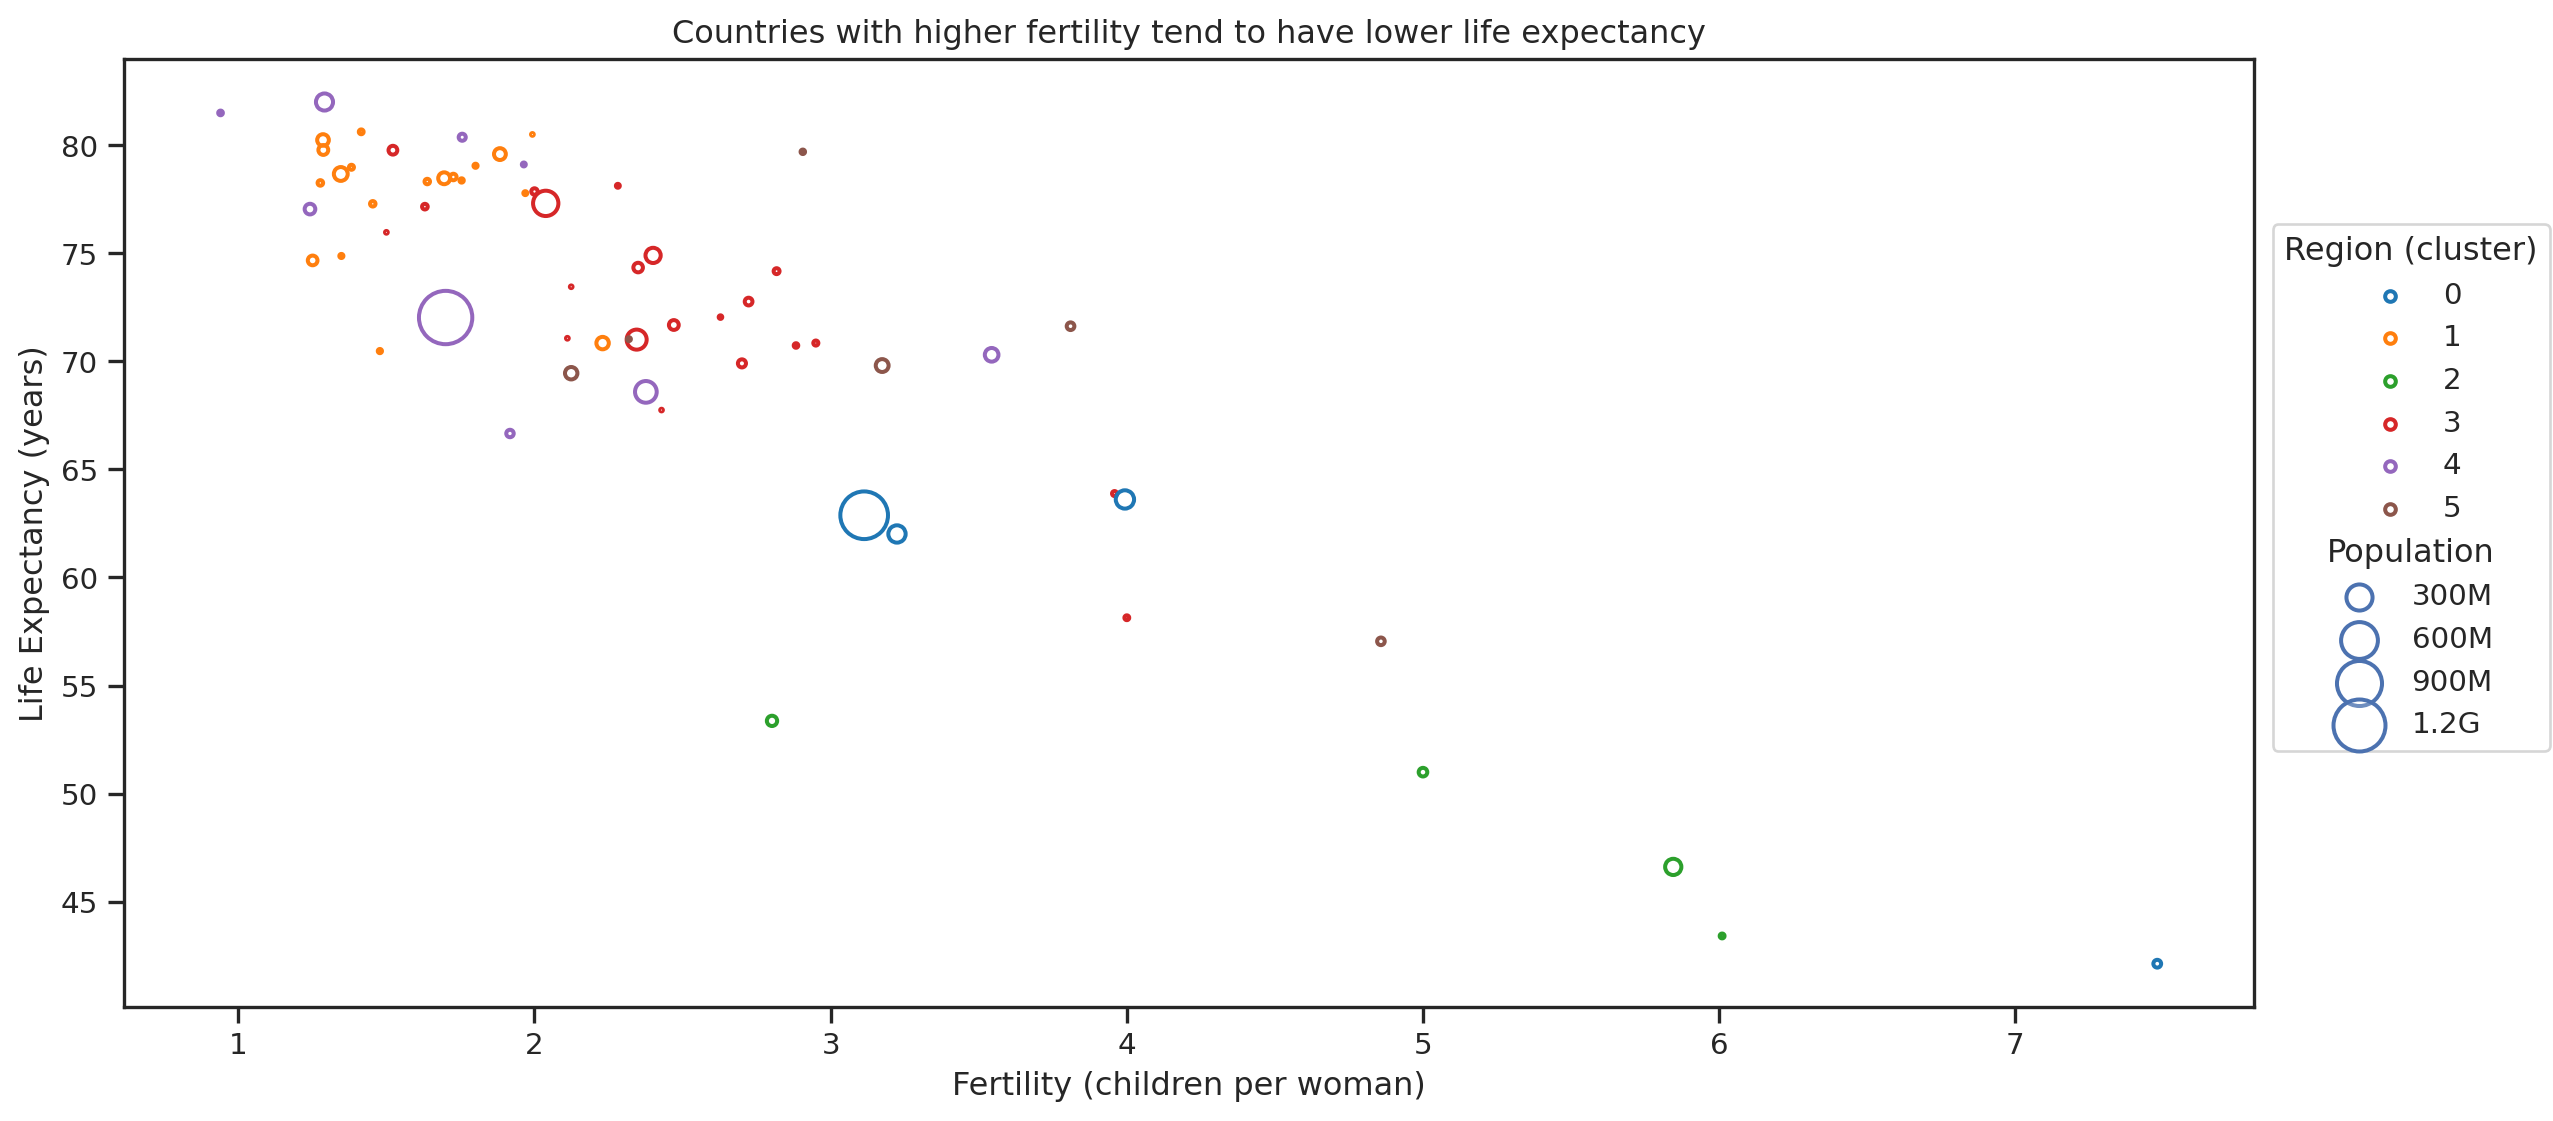

In [ ]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dots(fillcolor="white", stroke=1.5))
  .theme({**axes_style("ticks")})
  .scale(color="tab10",
         pointsize=so.Continuous((1,20)).tick(upto=5).label(unit=""))
  .label(x="Fertility (children per woman)",
         y="Life Expectancy (years)",
         color="Region (cluster)",
         pointsize="Population",
         title="Countries with higher fertility tend to have lower life expectancy")
  .layout(size=(12,6))           # change plot size
)